<a href="https://www.kaggle.com/code/dimasprayoga/unemployment-by-age-in-indonesia-2021-2024?scriptVersionId=258685700" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

Unemployment by Age in Indonesia (2021–2024)

This notebook analyzes unemployment in Indonesia across different age groups during the period **2021–2024**, using data from **Statistics Indonesia (BPS)**.  
The goal of this project is twofold:  
1. To demonstrate data analysis skills (data cleaning, EDA, and visualization) for portfolio purposes.  
2. To extract meaningful insights that could inform **policy makers, educators, and business stakeholders** about the labor market dynamics in Indonesia.  

By the end of this notebook, we aim to answer:  
- Which age groups are most affected by unemployment?  
- How has unemployment evolved between 2021 and 2024?  
- What insights can be drawn for labor market policy and workforce development?  

---


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pengangguran-menurut-golongan-umur-orang/data_pengangguran.csv


# Data Load

In [2]:
jobless = pd.read_csv('/kaggle/input/pengangguran-menurut-golongan-umur-orang/data_pengangguran.csv')

In [3]:
# Display first 5 rows
print(jobless.head())

  Golongan_Umur  Status  Tahun Bulan   Jumlah
0         15-19  Pernah   2021   Feb   281236
1         20-24  Pernah   2021   Feb  1338570
2         25-29  Pernah   2021   Feb  1111006
3         30-34  Pernah   2021   Feb   654139
4         35-39  Pernah   2021   Feb   518758


In [4]:
# Show structure info
print(jobless.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Golongan_Umur  264 non-null    object
 1   Status         264 non-null    object
 2   Tahun          264 non-null    int64 
 3   Bulan          264 non-null    object
 4   Jumlah         264 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 10.4+ KB
None


In [5]:
# Dataset dimensions
print("Dataset shape: \n rows and columns", jobless.shape)

Dataset shape: 
 rows and columns (264, 5)


In [6]:
# List of columns
print("Columns:", jobless.columns.tolist())

Columns: ['Golongan_Umur', 'Status', 'Tahun', 'Bulan', 'Jumlah']


In [7]:
# 1. Check missing values
print(jobless.isnull().sum())

Golongan_Umur    0
Status           0
Tahun            0
Bulan            0
Jumlah           0
dtype: int64


In [8]:
# 2. Check unique values for categorical fields
print("Years:", jobless["Tahun"].unique())
print("Periods:", jobless["Bulan"].unique())        # Expected: ['Feb', 'Aug']
print("Age Groups:", jobless["Golongan_Umur"].unique())
print("Status Categories:", jobless["Status"].unique())  # Expected: ['Pernah', 'Belum']

Years: [2021 2022 2023 2024]
Periods: ['Feb' 'Agu']
Age Groups: ['15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60+' 'Total']
Status Categories: ['Pernah' 'Tidak' 'Jumlah_penggaguran']


# Data Cleaning

In [9]:
# Rename columns for consistency
jobless = jobless.rename(columns={
    "Golongan_Umur": "Age_Group",
    "Status": "Status",
    "Tahun": "Year",
    "Bulan": "Period",
    "Jumlah": "Unemployed"
})


In [10]:
jobless.head()

,Age_Group,Status,Year,Period,Unemployed
0,15-19,Pernah,2021,Feb,281236
1,20-24,Pernah,2021,Feb,1338570
2,25-29,Pernah,2021,Feb,1111006
3,30-34,Pernah,2021,Feb,654139
4,35-39,Pernah,2021,Feb,518758


In [11]:
# Check missing values
print(jobless.isnull().sum())

# Drop rows with missing critical values (if any)
jobless = jobless.dropna(subset=["Year", "Period", "Age_Group", "Unemployed"])

Age_Group     0
Status        0
Year          0
Period        0
Unemployed    0
dtype: int64


In [12]:
# Convert datatypes
jobless["Year"] = jobless["Year"].astype(int)
jobless["Unemployed"] = jobless["Unemployed"].astype(int)

jobless["Period"] = jobless["Period"].astype("category")
jobless["Age_Group"] = jobless["Age_Group"].astype("category")
jobless["Status"] = jobless["Status"].astype("category")


In [13]:
jobless.head()

,Age_Group,Status,Year,Period,Unemployed
0,15-19,Pernah,2021,Feb,281236
1,20-24,Pernah,2021,Feb,1338570
2,25-29,Pernah,2021,Feb,1111006
3,30-34,Pernah,2021,Feb,654139
4,35-39,Pernah,2021,Feb,518758


In [14]:
# Find duplicates
duplicates = jobless.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates if found
jobless = jobless.drop_duplicates()


Number of duplicate rows: 0


In [15]:
# Aggregate to get total unemployed per group
total_unemployed = (
    jobless.groupby(["Year", "Period", "Age_Group"])["Unemployed"]
    .sum()
    .reset_index()
    .rename(columns={"Unemployed": "Total_Unemployed"})
)

print(total_unemployed.head())
warnings.filterwarnings("ignore")

   Year Period Age_Group  Total_Unemployed
0  2021    Agu     15-19           2938664
1  2021    Agu     20-24           5195614
2  2021    Agu     25-29           3051384
3  2021    Agu     30-34           1700144
4  2021    Agu     35-39           1307923


In [16]:
# Validation After Cleaning
print(jobless.info())
print(jobless.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Age_Group   264 non-null    category
 1   Status      264 non-null    category
 2   Year        264 non-null    int64   
 3   Period      264 non-null    category
 4   Unemployed  264 non-null    int64   
dtypes: category(3), int64(2)
memory usage: 5.7 KB
None
              Year    Unemployed
count   264.000000  2.640000e+02
mean   2022.500000  9.941786e+05
std       1.120158  1.623957e+06
min    2021.000000  1.760200e+04
25%    2021.750000  1.782312e+05
50%    2022.500000  4.007570e+05
75%    2023.250000  9.534875e+05
max    2024.000000  9.102052e+06


# Exploratory Data Analysis

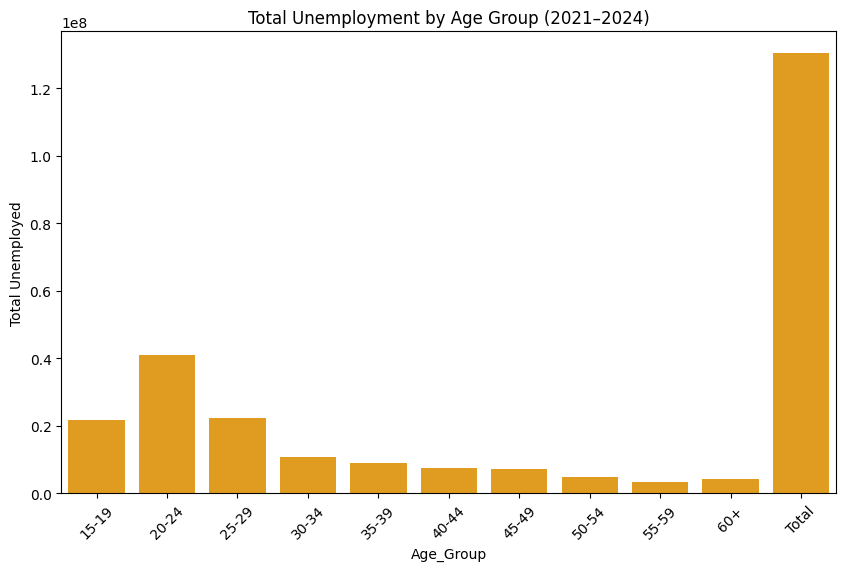

In [17]:
# Distribution of Unemployment by Age Group

plt.figure(figsize=(10,6))
sns.barplot(x="Age_Group", y="Unemployed", data=jobless, estimator=sum, ci=None, color='orange')
plt.title("Total Unemployment by Age Group (2021–2024)")
plt.xticks(rotation=45)
plt.ylabel("Total Unemployed")
plt.show()

warnings.filterwarnings("ignore")

Analyst’s note:
The data shows how unemployment is distributed across age groups. This highlights which age segments contribute the most to total unemployment over the observed period.

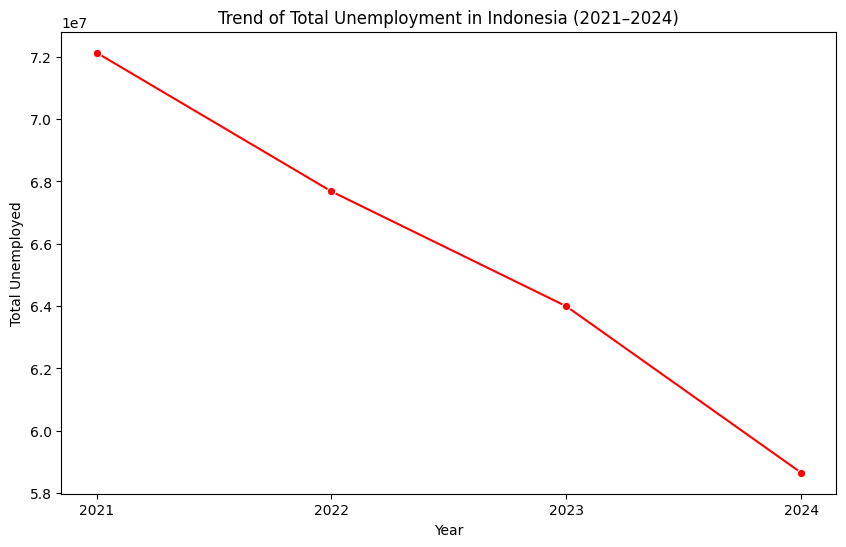

In [18]:
# Unemployment Trends (2021–2024)

plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Unemployed", data=jobless, estimator=sum, ci=None, marker="o", color='red')
plt.title("Trend of Total Unemployment in Indonesia (2021–2024)")
plt.xticks([2021, 2022, 2023, 2024])
plt.ylabel("Total Unemployed")
plt.show()

warnings.filterwarnings("ignore")

Analyst’s note:
This visualization tracks unemployment trends from 2021 to 2024. It helps identify whether unemployment levels are increasing, decreasing, or stable across the years.

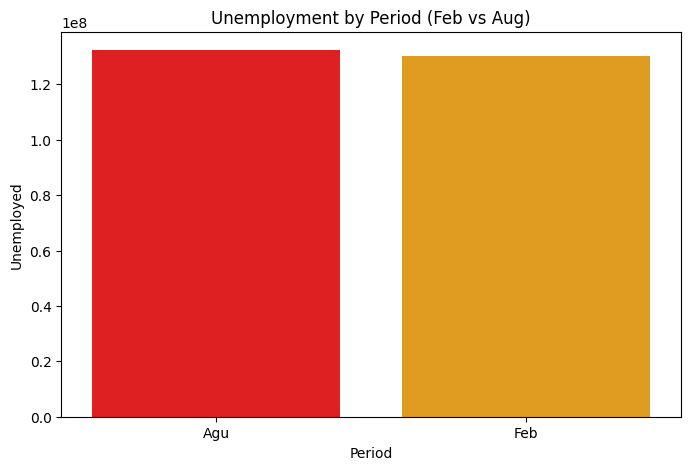

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x="Period", y="Unemployed", data=jobless, estimator=sum, ci=None, palette=["red", "orange"])
plt.title("Unemployment by Period (Feb vs Aug)")
plt.show()

Analyst’s note:
This visualization tracks unemployment trends from 2021 to 2024. It helps identify whether unemployment levels are increasing, decreasing, or stable across the years.

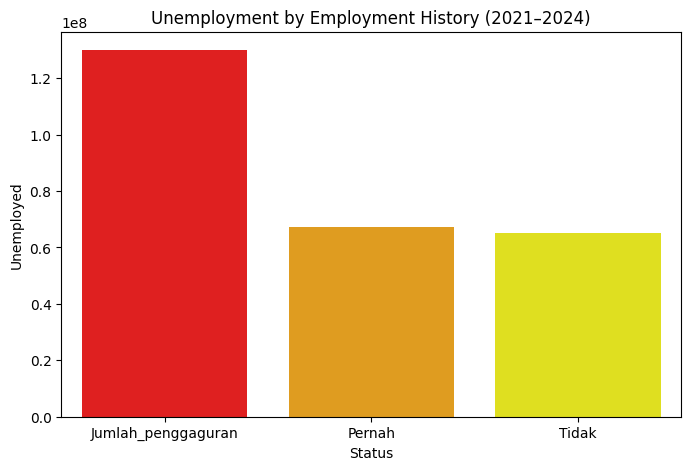

In [20]:
# Unemployment by Employment History

plt.figure(figsize=(8,5))
sns.barplot(x="Status", y="Unemployed", data=jobless, estimator=sum, ci=None, palette=["red", "orange", "yellow"])
plt.title("Unemployment by Employment History (2021–2024)")
plt.show()

Analyst’s note:
This chart compares the total unemployment between individuals who were previously employed and those who have never worked. The comparison helps to understand the structure of unemployment more clearly.

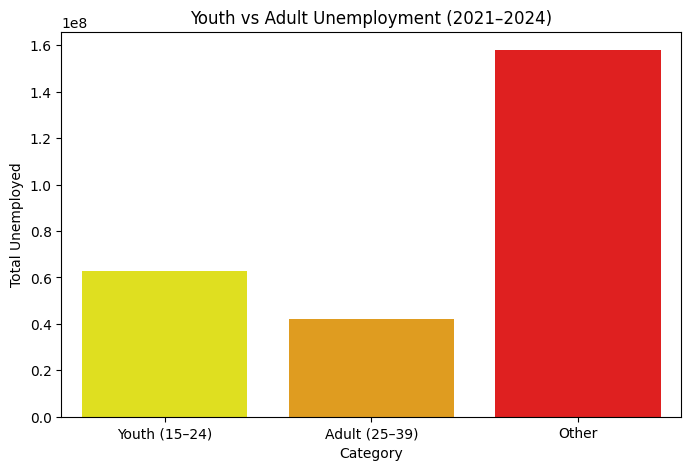

In [21]:
# Youth vs Adult Unemployment

jobless["Category"] = jobless["Age_Group"].apply(
    lambda x: "Youth (15–24)" if x in ["15-19", "20-24"] 
    else "Adult (25–39)" if x in ["25-29", "30-34", "35-39"] 
    else "Other"
)

plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Unemployed", data=jobless, estimator=sum, ci=None,palette=["yellow", "orange", "red"] )
plt.title("Youth vs Adult Unemployment (2021–2024)")
plt.ylabel("Total Unemployed")
plt.show()


Analyst’s note:
This breakdown highlights the proportion of unemployment between younger and adult working-age populations, offering insights into which group is more vulnerable.

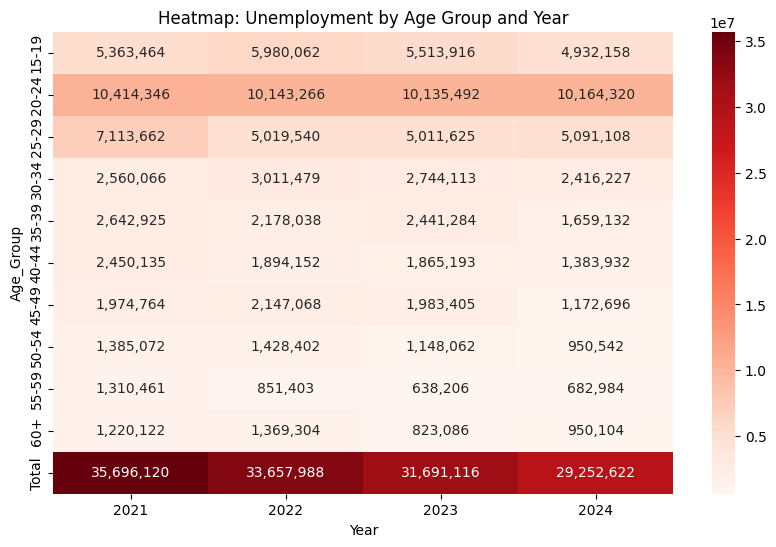

In [22]:
# Heatmap: Age Group vs Year

pivot = jobless.pivot_table(
    values="Unemployed",
    index="Age_Group",
    columns="Year",
    aggfunc="sum"
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=",.0f", cmap="Reds")
plt.title("Heatmap: Unemployment by Age Group and Year")
plt.show()


Analyst’s note:
This heatmap helps detect patterns over time and across age groups, showing which groups consistently experience high unemployment.

# Analysis (Interpretation of EDA)

1. Unemployment Distribution by Age Group

The data reveals that youth aged 15–24 consistently account for the highest share of unemployment between 2021 and 2024.
This highlights the challenge of school-to-work transition, where many young individuals struggle to secure their first job due to lack of experience and skill mismatches.
In contrast, older age groups show lower unemployment, but still face re-entry difficulties once they lose their jobs.

2. Trends in Unemployment (2021–2024)

Total unemployment peaked in 2021, during the aftermath of COVID-19’s economic shock.
From 2022 onward, the trend shows a gradual decline, reflecting recovery in the labor market.
However, the improvement is not evenly distributed across all age groups — younger workers remain disproportionately affected.

3. Employment History Comparison

When comparing categories, individuals who have never been employed represent the majority of the unemployed population.
This indicates that fresh graduates and first-time job seekers face greater challenges entering the labor market, compared to those who previously held jobs.
While layoffs do contribute to unemployment, they are consistently smaller in scale than the structural challenge faced by new entrants.

4. Youth vs Adult Unemployment

Across the dataset, the youth (15–24) group shows unemployment levels significantly higher than the adult group (25–39).
This gap remains persistent throughout the years, suggesting that unemployment in Indonesia is structural, not just cyclical — heavily tied to education-to-employment pathways.

5. Seasonality (Feb vs Aug)

Comparing periods, August tends to record higher unemployment compared to February.
This could be linked to the academic calendar, where a large number of graduates enter the job market around mid-year.
Such seasonality emphasizes the need for targeted interventions during peak entry periods.

🔹 Key Takeaways

Youth unemployment (15–24) dominates the dataset → confirming the main problem statement.

Post-pandemic recovery is visible, but improvement is uneven across age groups.

Never-employed individuals drive most of the unemployment, pointing to skill gaps and weak transition systems.

Youth vs Adult gap remains wide, reinforcing the structural nature of the issue.

Seasonal patterns (Aug > Feb) highlight the influence of graduation cycles on unemployment.

# Context - Insight - Recommendations

# 📌 Context
Unemployment remains one of Indonesia’s key labor market challenges.  
Using official data from BPS (Statistics Indonesia), this analysis explores unemployment by **age group**, **employment history**, and **time period (Feb & Aug)** for the years **2021–2024**.  

The main objectives of this analysis are:
- Identify which **age groups** are most affected by unemployment.  
- Explore the **trend of unemployment** post-pandemic (2021–2024).  
- Compare unemployment between **previously employed** vs **never employed** individuals.  
- Examine the gap between **youth (15–24)** and **adult (25–39)** groups.  

---

# 🔍 Insights

### 1. Unemployment by Age Group
- Youth (15–24 years old) consistently represent the **highest share of unemployment**.  
- This confirms structural challenges in the school-to-work transition.  

### 2. Trends Over Time (2021–2024)
- Unemployment **peaked in 2021** (post-COVID impact) and shows a **declining trend** in subsequent years.  
- Recovery is visible, but **youth unemployment remains persistently high** compared to adults.  

### 3. Employment History
- The **Never Employed** group dominates unemployment numbers.  
- This indicates that fresh graduates and first-time job seekers face greater barriers compared to those who were previously employed.  

### 4. Youth vs Adult Gap
- The unemployment gap between **youth (15–24)** and **adults (25–39)** is significant and consistent across years.  
- This suggests unemployment in Indonesia is not only cyclical (pandemic-driven) but also **structural**.  

### 5. Seasonality (Feb vs Aug)
- August records **higher unemployment** than February, likely influenced by the academic graduation cycle.  

---

# 💡 Recommendations

### For Policy Makers
- **Youth-focused job programs**: internships, apprenticeships, and vocational training to smooth school-to-work transition.  
- **Reskilling initiatives** for older workers, enabling re-entry into the labor market.  
- **Seasonal employment policies** around August, when graduate entry is at its peak.

### For Education & Training Institutions
- Strengthen **industry-aligned curricula** to reduce skill gaps.  
- Expand **career services** and university-industry partnerships.  

### For Recruiters & HR Professionals
- Focus recruitment efforts on **youth segments** as a large untapped talent pool.  
- Develop structured **onboarding and training programs** for first-time job seekers.  

### Additional Considerations
- **Networking and personal connections**: [ "bantuan orang dalam" ].  

---

# ✅ Key Takeaway
Youth unemployment (15–24) is the most persistent and structural issue in Indonesia’s labor market (2021–2024).  
While total unemployment is declining post-pandemic, **fresh graduates remain the most vulnerable group** — highlighting the urgent need for targeted interventions in education, skills, and early career opportunities.  
